In [8]:
import pandas as pd 
import numpy as py
import seaborn as sns
import missingno as msno

In [6]:
!pip install missingno

In [9]:
df = pd.read_csv("UpdatedStudentsPerformance.csv")

In [10]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


In [11]:
df.shape

(1000, 8)

In [13]:
df.size

8000

In [14]:
df.isna()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [15]:
df.isna().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     10
reading score                  15
writing score                  11
dtype: int64

<Axes: >

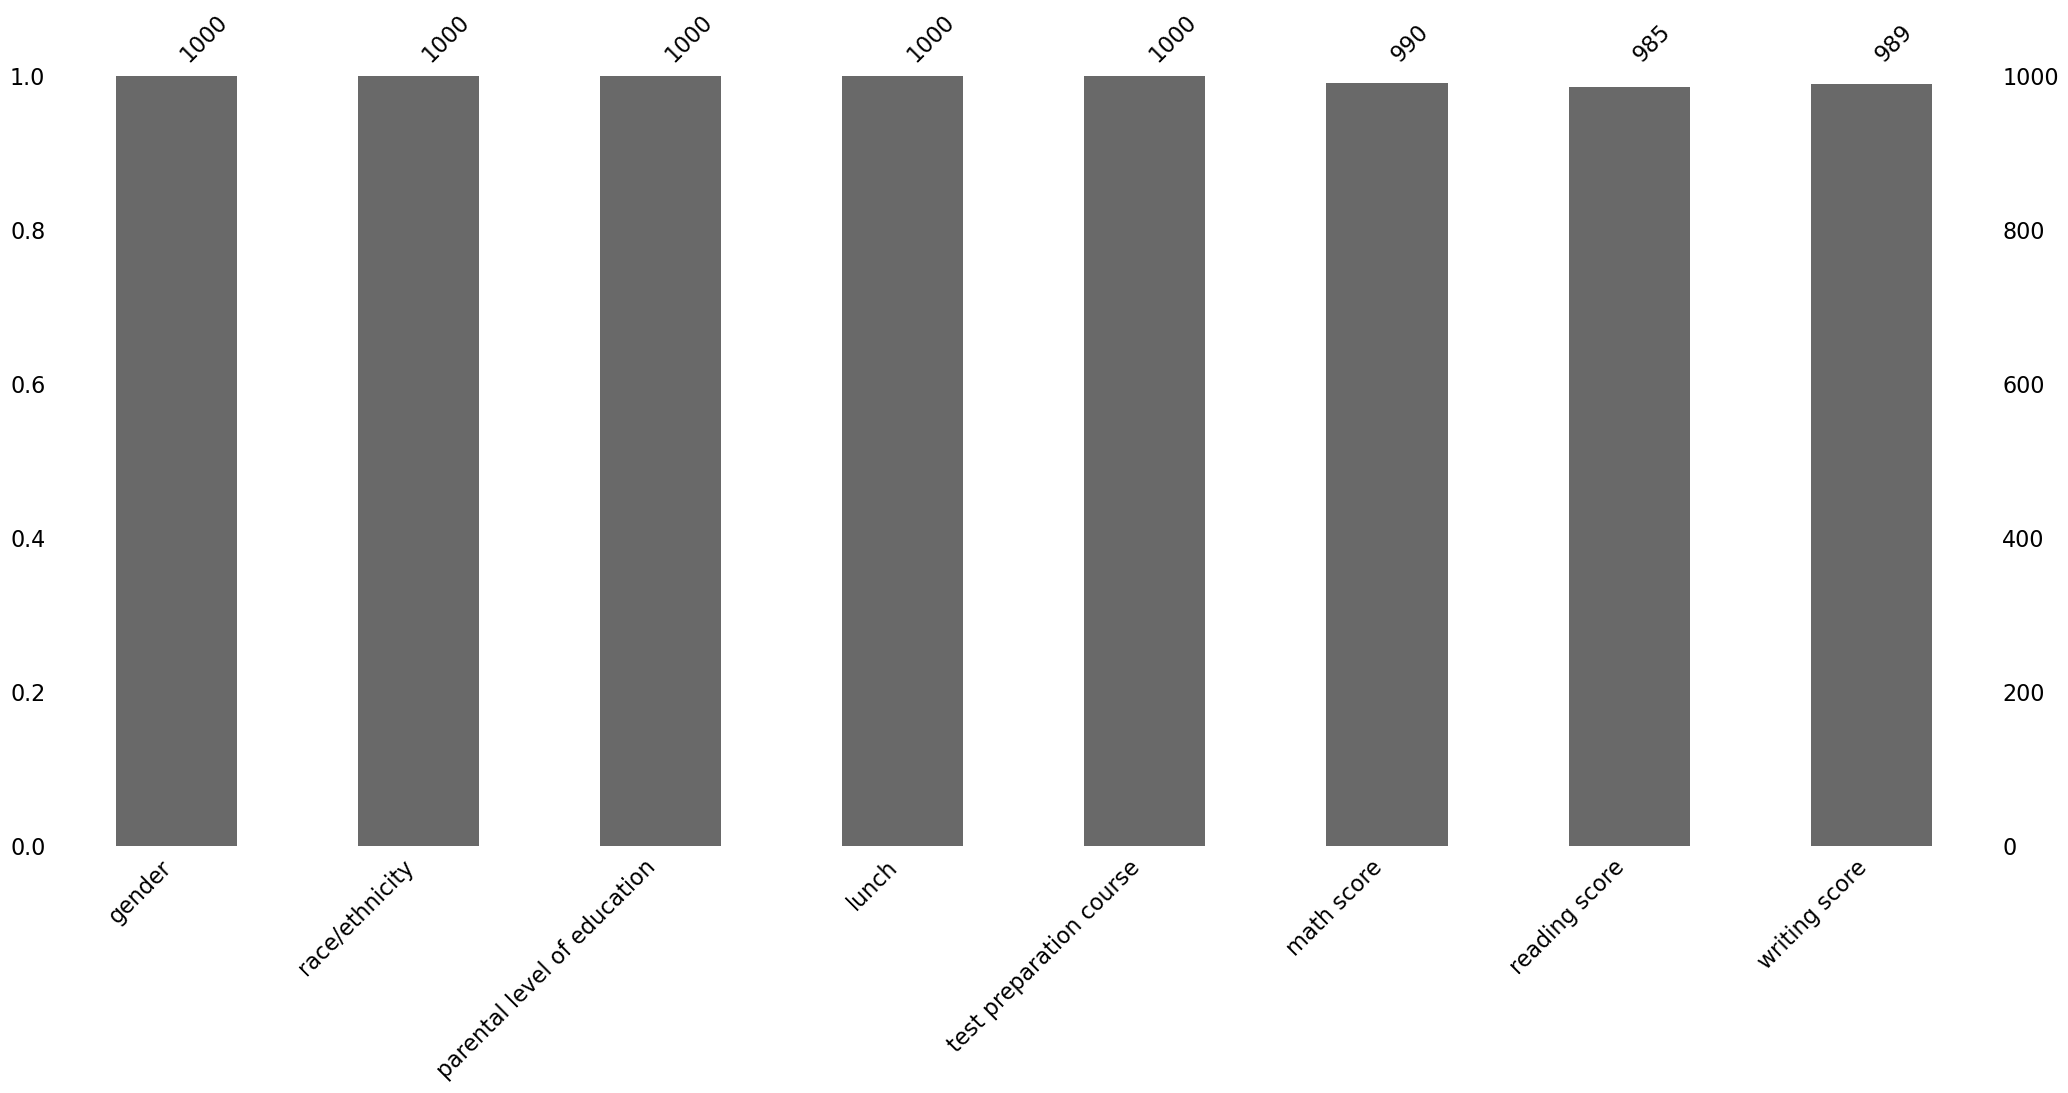

In [16]:
msno.bar(df)

<Axes: >

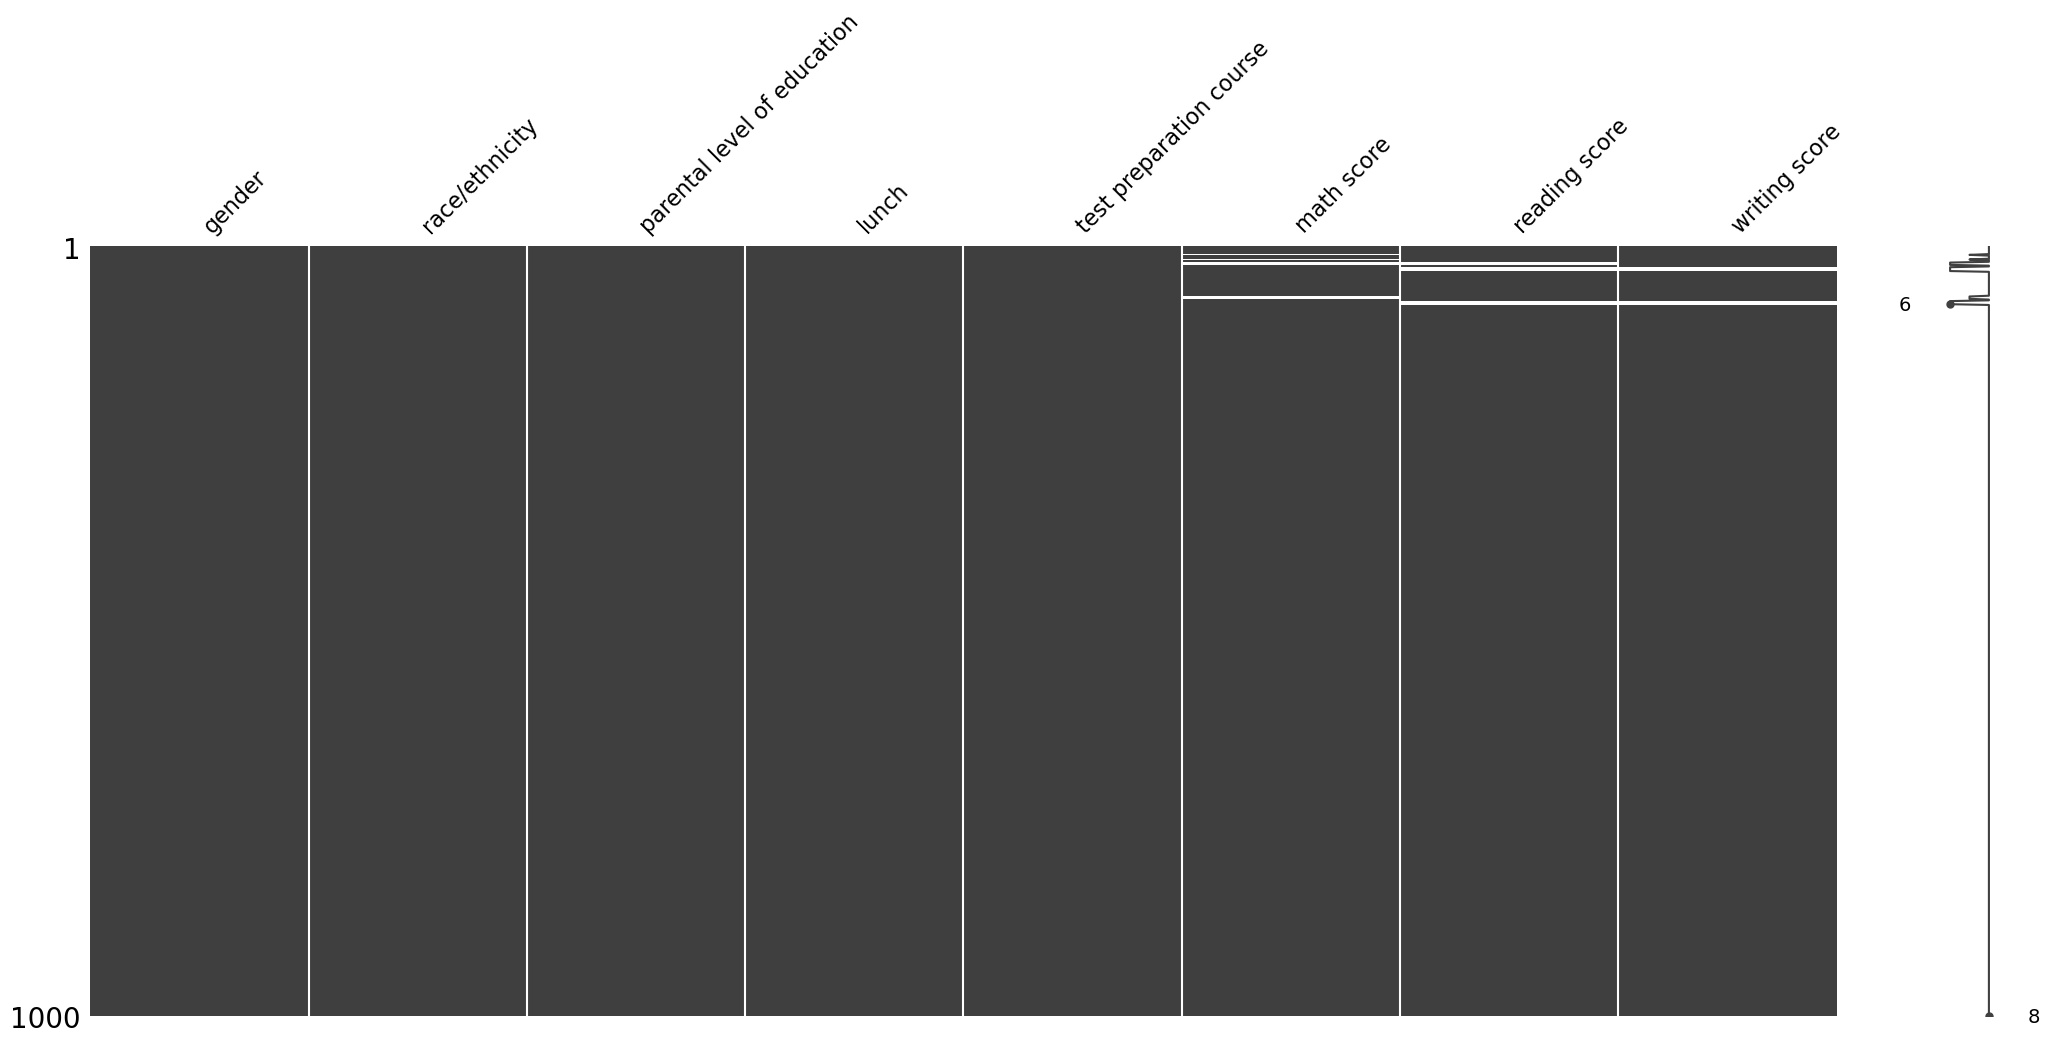

In [17]:
msno.matrix(df)

<Axes: >

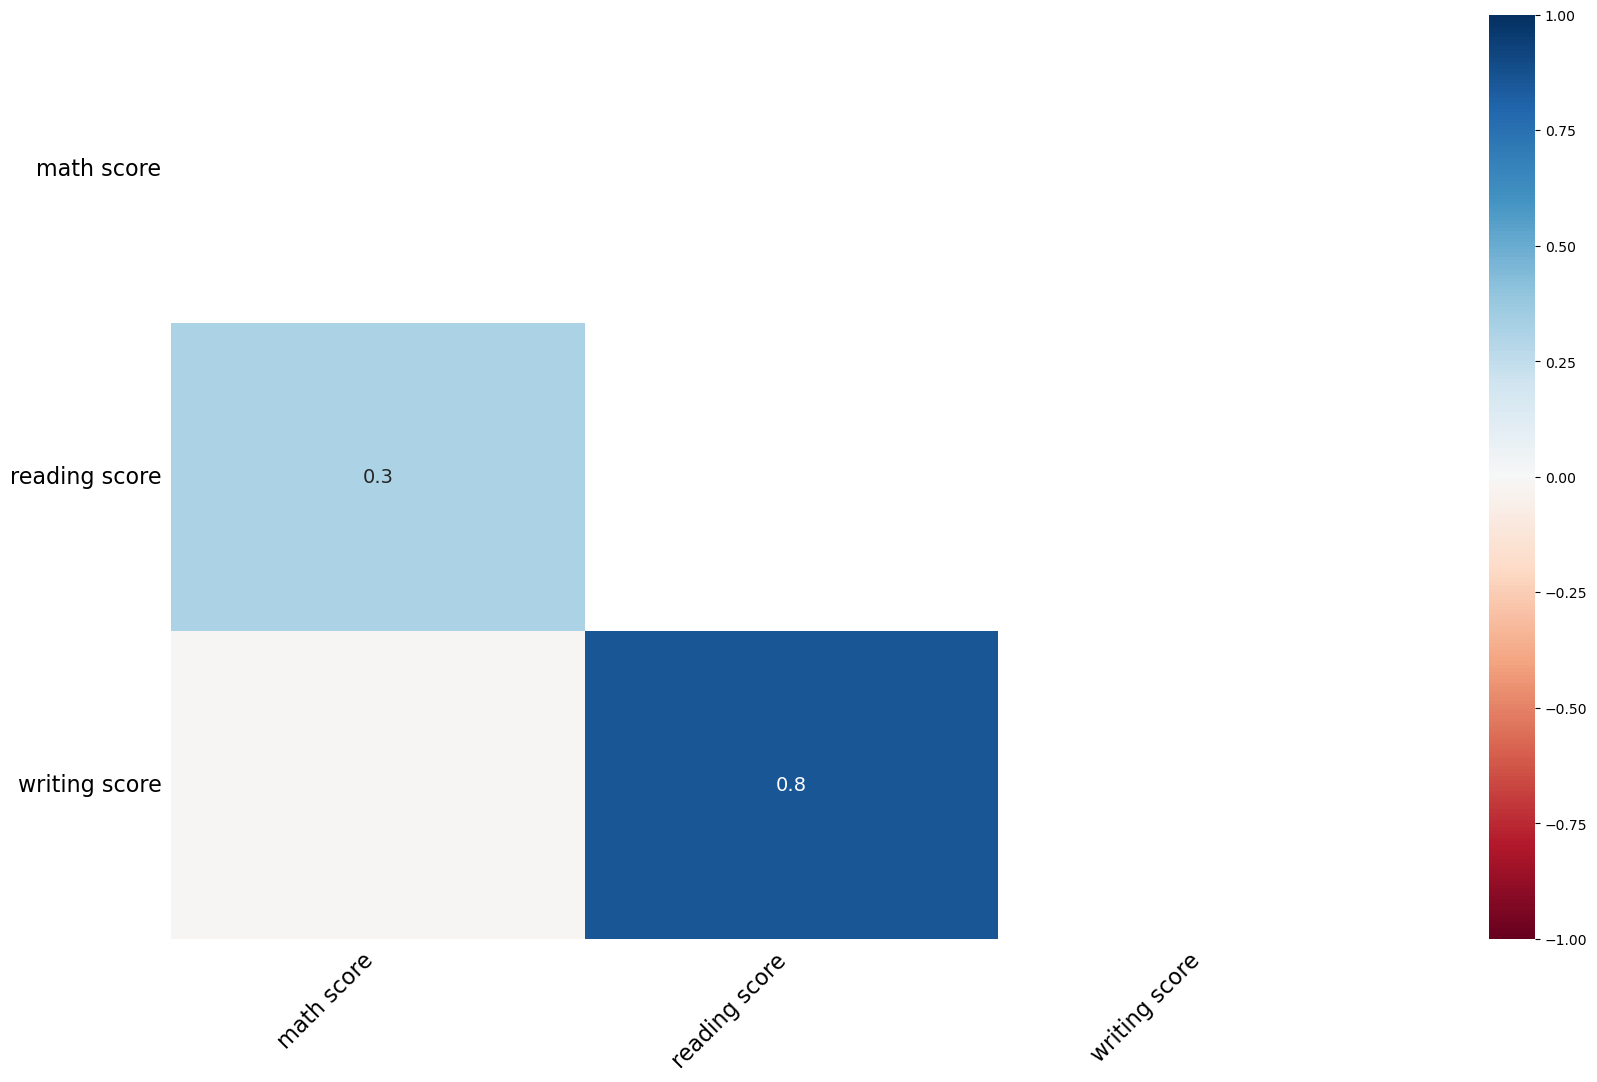

In [18]:
msno.heatmap(df)

<Axes: >

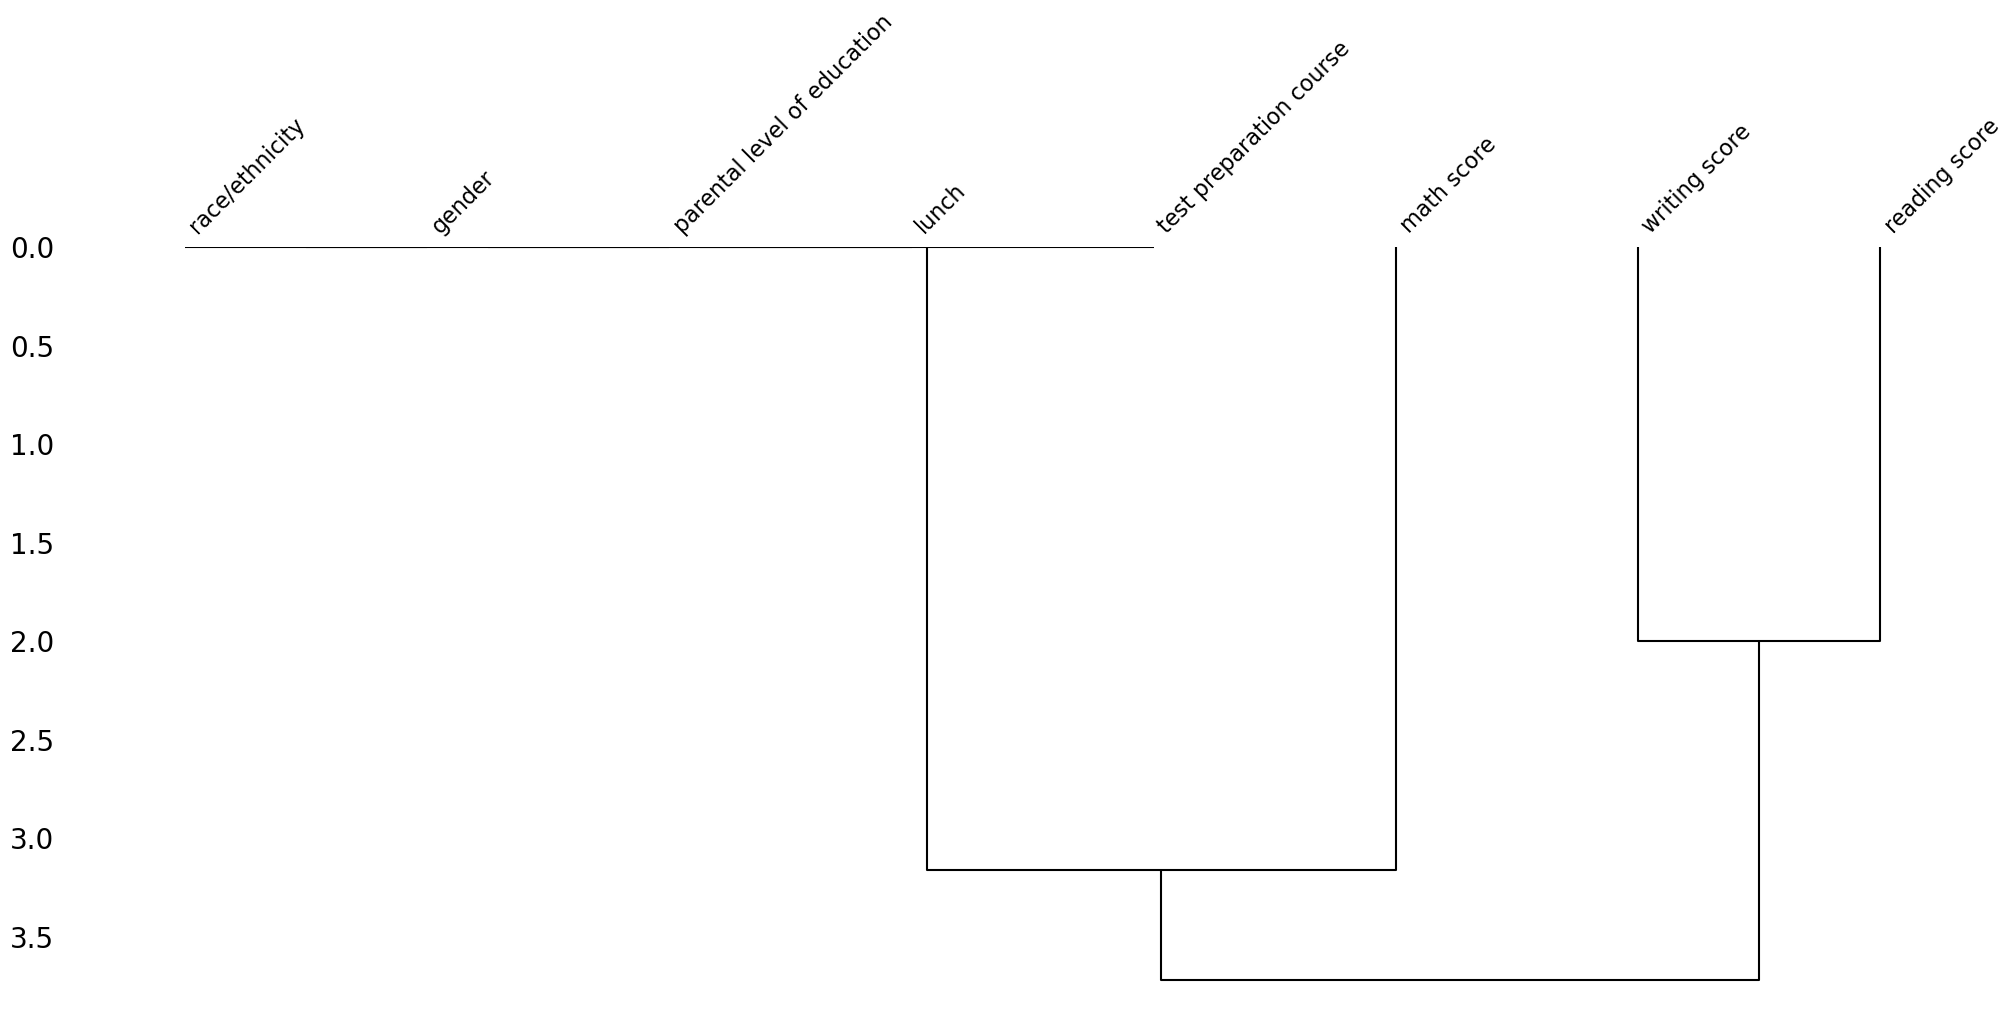

In [20]:
msno.dendrogram(df)

In [21]:
df = df.fillna(df.mean())

C:\Users\Ankush Mehta\AppData\Local\Temp\ipykernel_17436\114435927.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [22]:
df=df.fillna(df.mean())

C:\Users\Ankush Mehta\AppData\Local\Temp\ipykernel_17436\3358723971.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.mean())


In [23]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<Axes: >

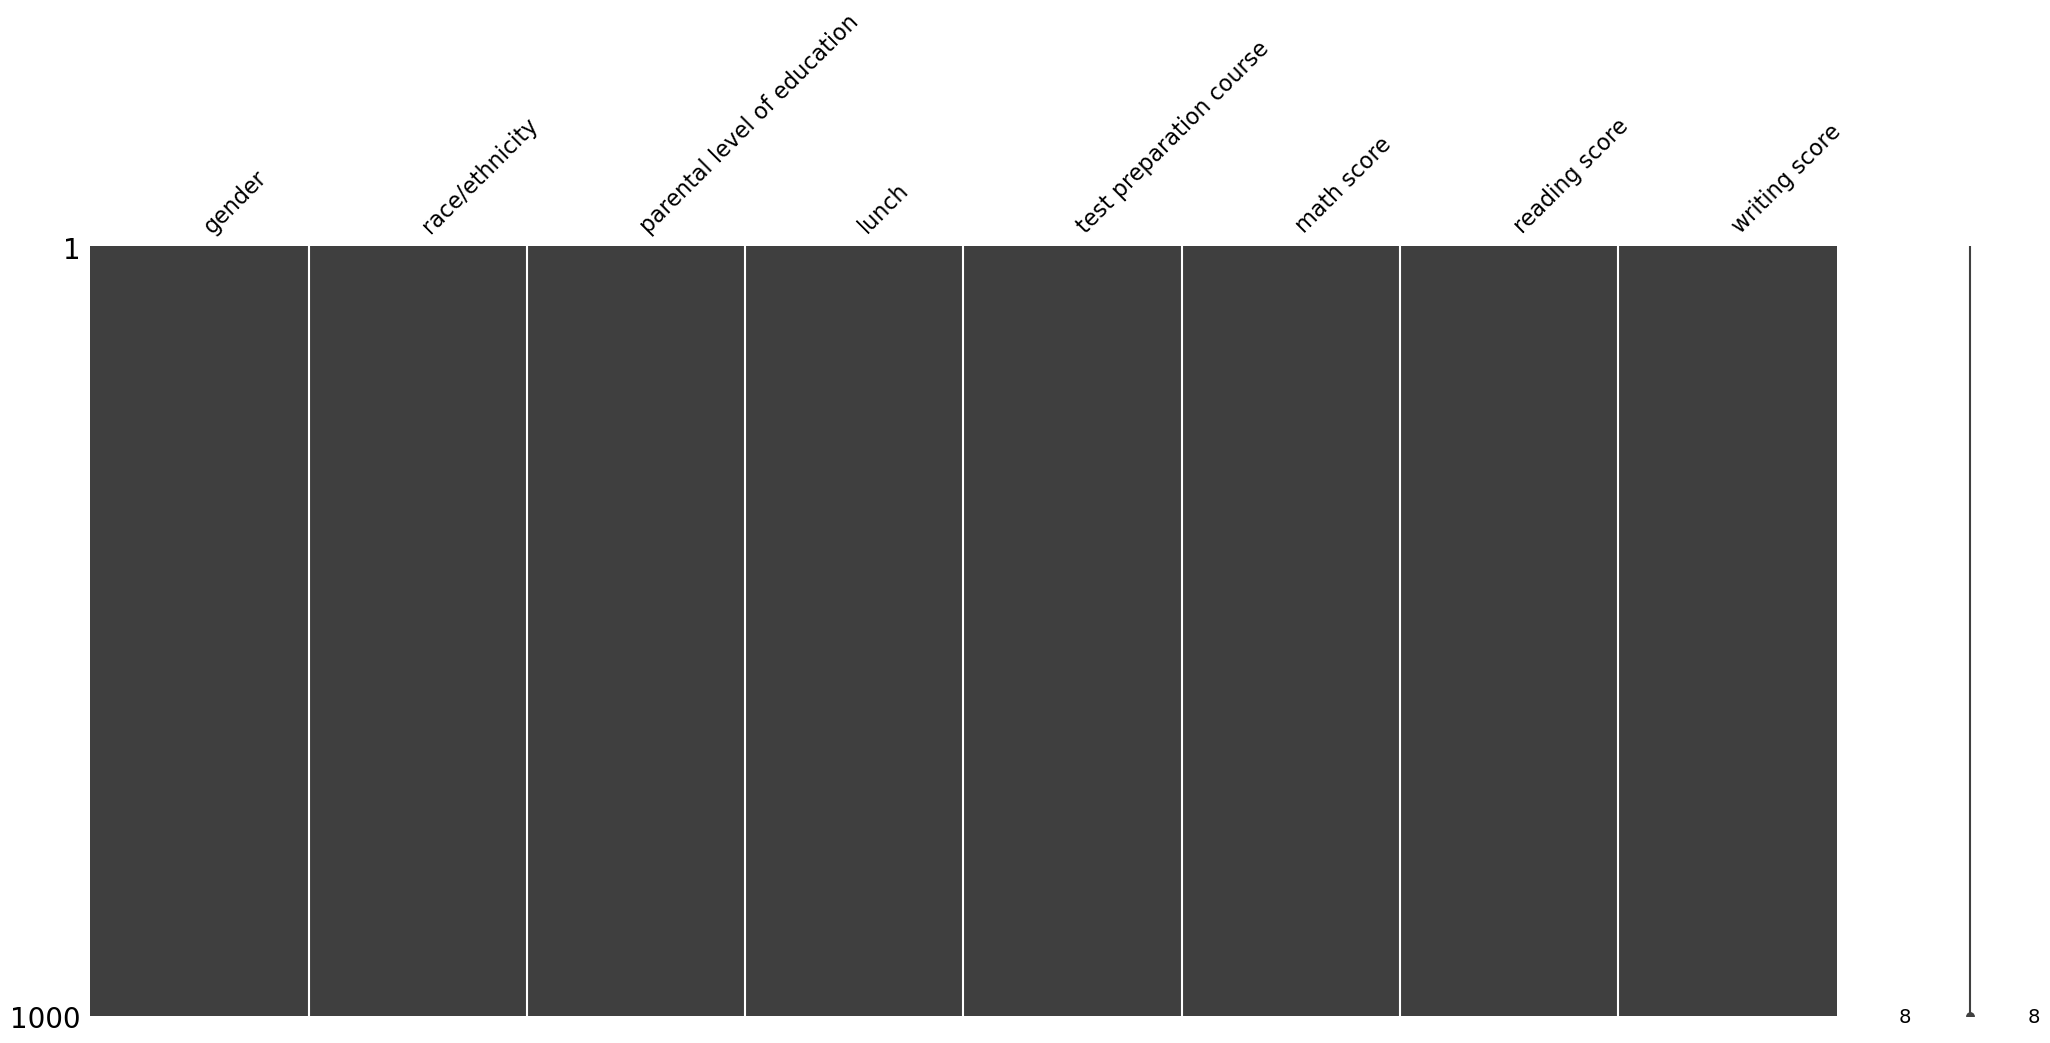

In [24]:
msno.matrix(df)

<Axes: >

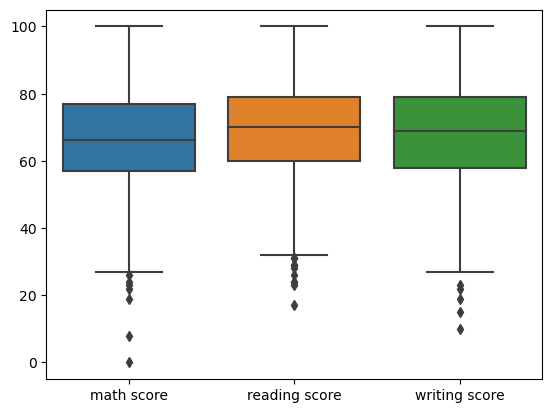

In [25]:
sns.boxplot(df)

In [27]:
df_new = pd.concat([df['math score'],df['reading score'],df['writing score']],axis = 1)

In [28]:
df_new

,math score,reading score,writing score
0,72.0,72.0,74.0
1,69.0,90.0,88.0
2,90.0,95.0,93.0
3,47.0,57.0,44.0
4,76.0,78.0,75.0
...,...,...,...
995,88.0,99.0,95.0
996,62.0,55.0,55.0
997,59.0,71.0,65.0
998,68.0,78.0,77.0


In [29]:
q1 = df_new.quantile(0.25)
q3 = df_new.quantile(0.75)
IQR = q3 - q1
print(IQR)

math score       20.0
reading score    19.0
writing score    21.0
dtype: float64


In [30]:
low = q1 - 1.5*IQR
high = q3 + 1.5*IQR
print(low,high)

math score       27.0
reading score    31.5
writing score    26.5
dtype: float64 math score       107.0
reading score    107.5
writing score    110.5
dtype: float64


In [73]:
new_df = df_new[~((df_new < low) | (df_new > high)).any(axis = 1)]

In [82]:
new_df

,math,reading,writing
0,0.616438,0.588235,0.638889
1,0.575342,0.852941,0.833333
2,0.863014,0.926471,0.902778
3,0.273973,0.367647,0.222222
4,0.671233,0.676471,0.652778
...,...,...,...
981,0.835616,0.985294,0.930556
982,0.479452,0.338235,0.375000
983,0.438356,0.573529,0.513889
984,0.561644,0.676471,0.680556


In [75]:
new_df.shape
df_new.shape

(1000, 3)

In [76]:
print(new_df.shape)
print(df_new.shape)

(986, 3)
(1000, 3)


<Axes: >

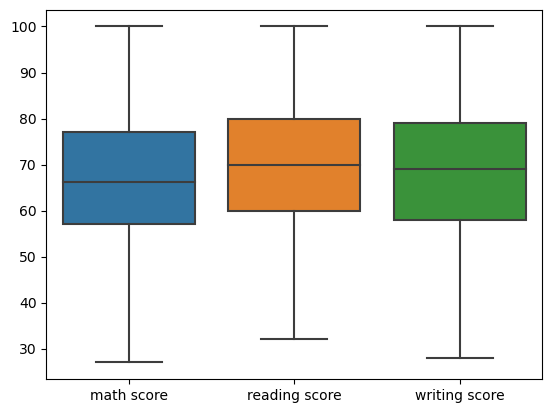

In [35]:
sns.boxplot(new_df)

<Axes: ylabel='Count'>

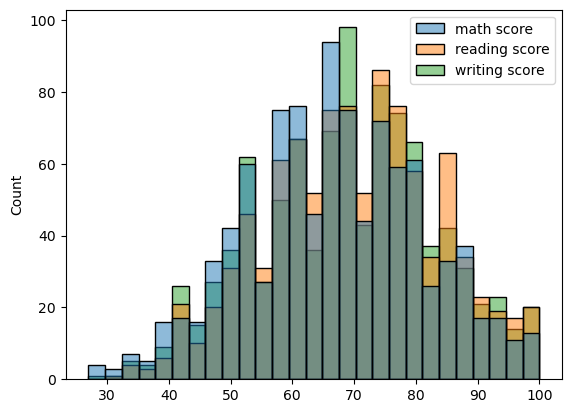

In [36]:
sns.histplot(new_df)

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [84]:
scaler = MinMaxScaler()
new_df=scaler.fit_transform(new_df)
new_df

array([[0.61643836, 0.58823529, 0.63888889],
       [0.57534247, 0.85294118, 0.83333333],
       [0.8630137 , 0.92647059, 0.90277778],
       ...,
       [0.43835616, 0.57352941, 0.51388889],
       [0.56164384, 0.67647059, 0.68055556],
       [0.68493151, 0.79411765, 0.80555556]])

In [85]:
new_df=pd.DataFrame(new_df,columns=['math','reading','writing'])
new_df

,math,reading,writing
0,0.616438,0.588235,0.638889
1,0.575342,0.852941,0.833333
2,0.863014,0.926471,0.902778
3,0.273973,0.367647,0.222222
4,0.671233,0.676471,0.652778
...,...,...,...
981,0.835616,0.985294,0.930556
982,0.479452,0.338235,0.375000
983,0.438356,0.573529,0.513889
984,0.561644,0.676471,0.680556


[array([0.61643836, 0.58823529, 0.63888889]),
 array([0.57534247, 0.85294118, 0.83333333]),
 array([0.8630137 , 0.92647059, 0.90277778]),
 array([0.2739726 , 0.36764706, 0.22222222]),
 array([0.67123288, 0.67647059, 0.65277778]),
 array([0.60273973, 0.75      , 0.69444444]),
 array([0.83561644, 0.92647059, 0.88888889]),
 array([0.17808219, 0.16176471, 0.15277778]),
 array([0.50684932, 0.47058824, 0.54166667]),
 array([0.15068493, 0.41176471, 0.30555556]),
 array([0.42465753, 0.32352941, 0.33333333]),
 array([0.537097  , 0.29411765, 0.20833333]),
 array([0.52054795, 0.72058824, 0.625     ]),
 array([0.69863014, 0.58823529, 0.58333333]),
 array([0.31506849, 0.30882353, 0.41666667]),
 array([0.57534247, 0.63235294, 0.69444444]),
 array([0.83561644, 0.83823529, 0.80555556]),
 array([0.537097, 0.      , 0.      ]),
 array([0.26027397, 0.14705882, 0.25      ]),
 array([0.36986301, 0.38235294, 0.45833333]),
 array([0.53424658, 0.54411765, 0.48611111]),
 array([0.537097  , 0.54796954, 0.583333

In [44]:
new_df

,0.616438,0.588235,0.638889
,0.575342,0.852941,0.833333
,0.863014,0.926471,0.902778
,0.273973,0.367647,0.222222
,0.671233,0.676471,0.652778
,0.602740,0.750000,0.694444
,0.835616,0.926471,0.888889
,0.178082,0.161765,0.152778
,0.506849,0.470588,0.541667
,0.150685,0.411765,0.305556
,0.424658,0.323529,0.333333


In [45]:
new_df=pd.DataFrame(new_df,columns=['math','reading','writing'])

In [46]:
new_df

,math,reading,writing
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
981,NaN,NaN,NaN
982,NaN,NaN,NaN
983,NaN,NaN,NaN
984,NaN,NaN,NaN


In [86]:
new_df

,math,reading,writing
0,0.616438,0.588235,0.638889
1,0.575342,0.852941,0.833333
2,0.863014,0.926471,0.902778
3,0.273973,0.367647,0.222222
4,0.671233,0.676471,0.652778
...,...,...,...
981,0.835616,0.985294,0.930556
982,0.479452,0.338235,0.375000
983,0.438356,0.573529,0.513889
984,0.561644,0.676471,0.680556


<Axes: ylabel='Count'>

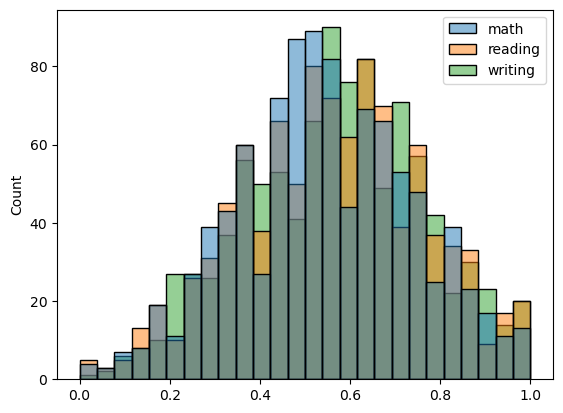

In [87]:
sns.histplot(new_df)

<Axes: >

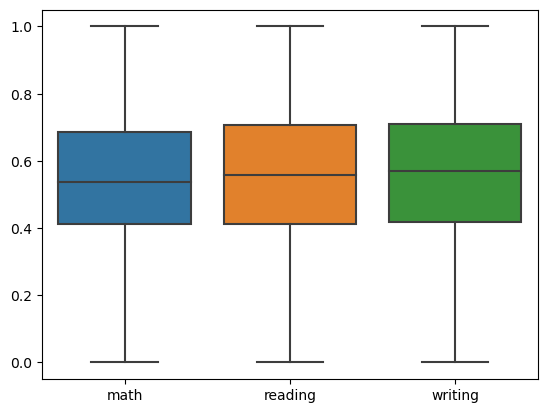

In [88]:
sns.boxplot(new_df)


<Axes: >

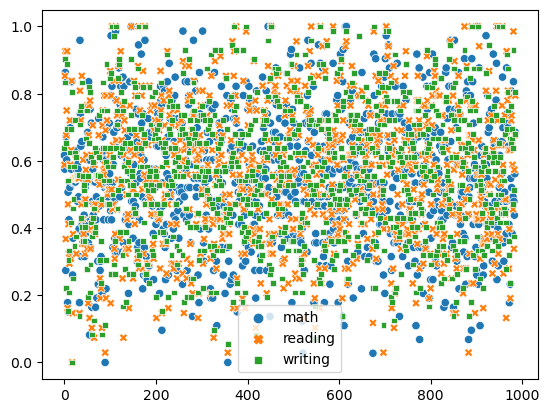

In [89]:
sns.scatterplot(new_df)

<Axes: ylabel='count'>

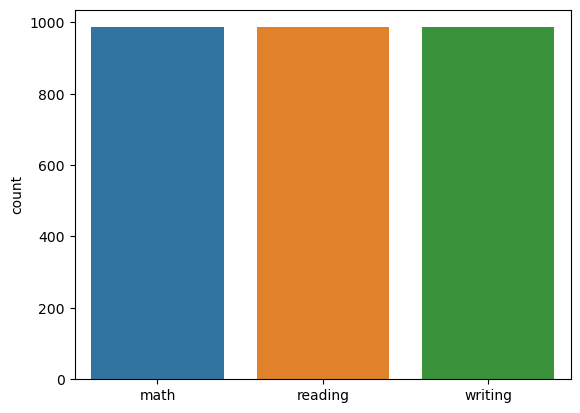

In [90]:
sns.countplot(new_df)